In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt 
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

Using TensorFlow backend.


In [2]:
batch_size = 300
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
#loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

tmppp=y_test

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [4]:
#for normalizing data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [6]:
#one hot encoding data
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3965952   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 3,977,930
Trainable params: 3,977,866
Non-trainable params: 64
_________________________________________________________________

In [11]:
print(y_train.shape)

(60000, 10)


In [12]:
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/3
57000/57000 [==============================] - 14s 238us/step - loss: 0.1764 - acc: 0.9537 - val_loss: 0.0626 - val_acc: 0.9833
Epoch 2/3
57000/57000 [==============================] - 6s 113us/step - loss: 0.0329 - acc: 0.9898 - val_loss: 0.0417 - val_acc: 0.9897
Epoch 3/3
57000/57000 [==============================] - 6s 113us/step - loss: 0.0165 - acc: 0.9950 - val_loss: 0.0428 - val_acc: 0.9900


In [13]:
model.save('Mnist_CNN')

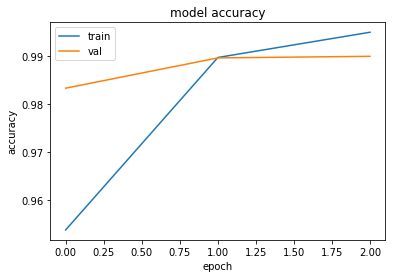

In [14]:
# summarize history for accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

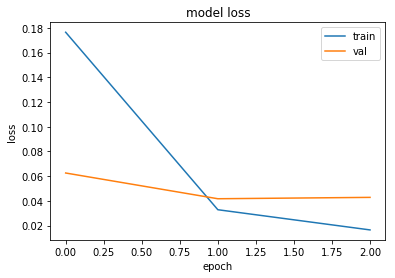

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Test loss: 0.048289143322209564
Test accuracy: 0.9868
[0.048289143322209564, 0.9868]


In [17]:
x_test.shape

(10000, 28, 28, 1)

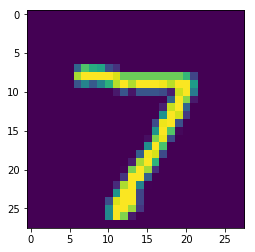

In [18]:
imgplot = plt.imshow(x_test[0].reshape(28,28))
plt.show()

In [19]:
y_pred = model.predict(x_test)
Y_pred = model.predict_classes(x_test, verbose=0)
# y_pred = np.argmax(Y_pred, axis=1)
print(Y_pred.shape)
print(y_pred.shape)

(10000,)
(10000, 10)


In [20]:
confusion_matrix = confusion_matrix(tmppp, Y_pred)

In [21]:
print(confusion_matrix)

[[ 977    0    0    0    0    0    2    1    0    0]
 [   4 1114    4    3    0    0    2    2    6    0]
 [   0    0 1024    0    1    0    0    5    2    0]
 [   0    0    4  998    0    4    0    0    4    0]
 [   0    0    0    0  953    0    4    0    1   24]
 [   2    0    0    4    0  882    3    0    0    1]
 [   5    1    1    0    1    2  947    0    1    0]
 [   0    0    7    1    0    0    0 1020    0    0]
 [   4    0    5    1    0    1    1    2  958    2]
 [   0    1    0    1    2    2    0    3    5  995]]


In [22]:
f_scores= f1_score(tmppp,Y_pred,average=None)

In [23]:
print(f_scores)

[0.99087221 0.98978232 0.98603755 0.98909812 0.98298092 0.9893438
 0.98800209 0.98981077 0.98206048 0.9798129 ]


In [24]:
np.save('confusion.npy', confusion_matrix)
np.save('fscore.npy', f_scores)